In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

In [2]:
import os

import networkx as nx
import pandas as pd
import random as rd
import numpy as np
import matplotlib.pyplot as plt

from celluloid import Camera
from matplotlib.animation import PillowWriter
from time import time
from model import Walktrap

In [3]:
def create_graph(csv_path):
    data = pd.read_csv(csv_path, header = None)
    G = nx.Graph(data)
    return G

In [4]:
path = "./Konkurs/"
competition_names = os.listdir(path)
graphs = [create_graph(path + competition_names[i]) for i in range(len(competition_names))]
nodes_position = [nx.spring_layout(graph) for graph in graphs]
walks = [Walktrap(graph) for graph in graphs]
times = []
for walk in walks:
    start = time()
    walk.iterate()
    times.append(time() - start)
    
clusters = [max(walk.modularities, key=walk.modularities.get) for walk in walks]

In [5]:
def draw_clusters(clusters, G, nodes_position):
    colors = np.random.random((25,3))  
    plt.figure(figsize=(10,6)) 
    dct = {n: colors[i] for i, C in enumerate(clusters) for n in C}
    nx.draw(G, node_color=[dct[n] for n in G.nodes()], pos=nodes_position, with_labels = True, edge_color = "grey")
    plt.show()
    
def show_cluster_data(idx):
    print(f"Data: {competition_names[idx]}")
    print(f"Algorithm time: {times[idx]:.3f}s")
    for cluster in clusters[idx]:
        print(cluster)
    draw_clusters(clusters[idx], graphs[idx], nodes_position[idx])

Data: D1-K=2.csv
Algorithm time: 0.126s
(1,)
(11,)
(4, 5, 6, 10, 14)
(0, 2, 3, 7, 8, 9, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26)
(32, 33, 27, 28, 29, 30, 31)


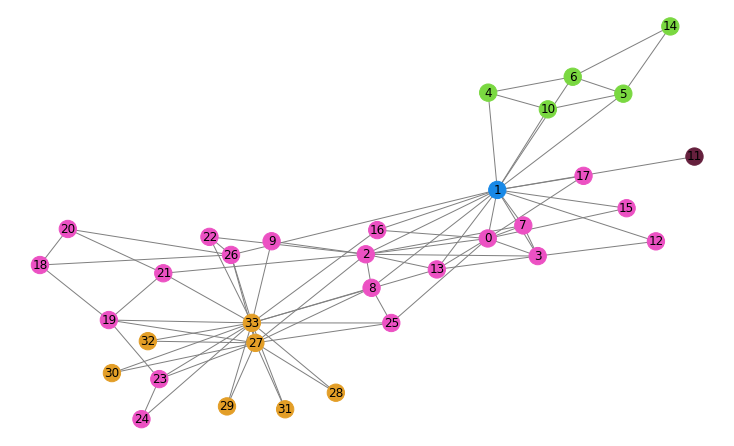

Data: D1-NLK.csv
Algorithm time: 3.659s
(20, 21, 22, 23, 24)
(90, 91, 92, 93, 94)
(25, 26, 27, 28, 29)
(64, 60, 61, 62, 63)
(50, 51, 52, 53, 54)
(75, 76, 77, 78, 79)
(40, 41, 42, 43, 44)
(48, 49, 45, 46, 47)
(55, 56, 57, 58, 59)
(16, 17, 18, 19, 15)
(85, 86, 87, 88, 89)
(105, 106, 107, 108, 109)
(0, 1, 2, 3, 4)
(120, 121, 122, 123, 124)
(70, 71, 72, 73, 74)
(112, 113, 114, 110, 111)
(10, 11, 12, 13, 14)
(32, 33, 34, 30, 31)
(65, 66, 67, 68, 69)
(100, 101, 102, 103, 104)
(80, 81, 82, 83, 84)
(5, 6, 7, 8, 9, 115, 116, 117, 118, 119)
(96, 97, 98, 99, 35, 36, 37, 38, 39, 95)


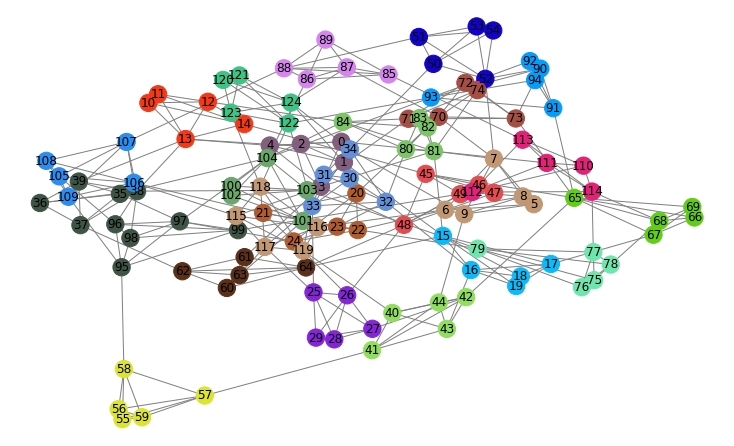

Data: D2-K=7.csv
Algorithm time: 0.433s
(4,)
(11,)
(12,)
(17,)
(22,)
(29,)
(31,)
(32,)
(33,)
(35,)
(38,)
(48,)
(51,)
(57,)
(58,)
(60,)
(1, 26, 27, 25)
(0, 2, 3, 7, 8, 10, 14, 15, 16, 18, 19, 20, 21, 23, 24, 28, 30, 36, 37, 39, 40, 41, 42, 44, 45, 47, 50, 52, 53, 54, 55, 59, 61)
(5, 6, 56, 9, 13)
(49, 34, 43, 46)


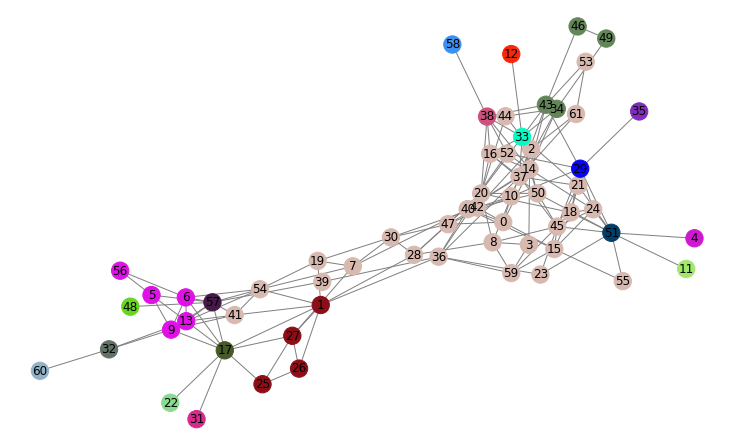

Data: D2-NLK.csv
Algorithm time: 8.875s
(128, 129, 120, 121, 122, 123, 124, 125, 126, 127)
(140, 141, 142, 143, 144, 145, 146, 147, 148, 149)
(110, 111, 112, 113, 114, 115, 116, 117, 118, 119)
(64, 65, 66, 67, 68, 69, 60, 61, 62, 63)
(70, 71, 72, 73, 74, 75, 76, 77, 78, 79)
(32, 33, 34, 35, 36, 37, 38, 39, 30, 31)
(20, 21, 22, 23, 24, 25, 26, 27, 28, 29)
(100, 101, 102, 103, 104, 105, 106, 107, 108, 109)
(130, 131, 132, 133, 134, 135, 136, 137, 138, 139)
(50, 51, 52, 53, 54, 55, 56, 57, 58, 59)
(10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
(80, 81, 82, 83, 84, 85, 86, 87, 88, 89)
(40, 41, 42, 43, 44, 45, 46, 47, 48, 49)
(96, 97, 98, 99, 90, 91, 92, 93, 94, 95)
(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)


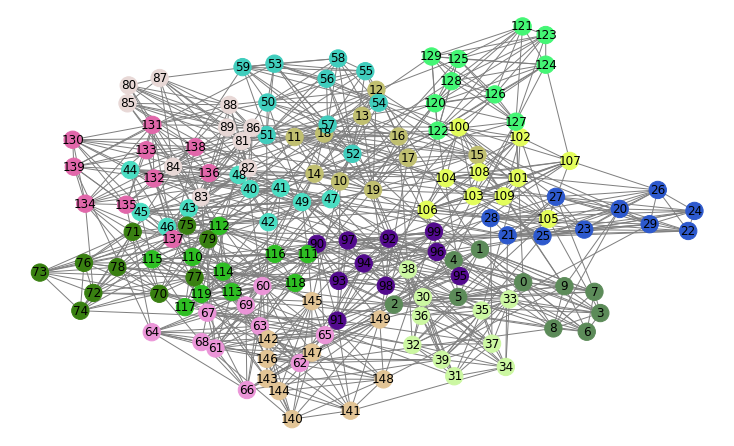

Data: D3-K=12.csv
Algorithm time: 3.267s
(1, 67, 102, 15, 49, 18, 19, 89, 29)
(2, 100, 69, 37, 68, 72, 52, 55, 30)
(64, 7, 74, 42, 75, 78, 82, 114, 53, 90, 60)
(65, 34, 97, 71, 40, 43, 12, 17, 87, 92)
(32, 99, 104, 45, 112, 51, 20, 23, 25, 59, 31, 57)
(66, 38, 39, 41, 76, 13, 81, 86, 22, 24, 26, 91)
(0, 3, 70, 9, 108, 14, 83, 85, 21, 58)
(35, 4, 5, 101, 103, 105, 106, 109, 110, 111, 47, 50, 88, 27)
(96, 33, 6, 73, 46, 79, 16, 113, 93, 54, 56, 28, 61, 62)
(98, 36, 8, 10, 11, 107, 77, 44, 48, 80, 84, 94, 95, 63)


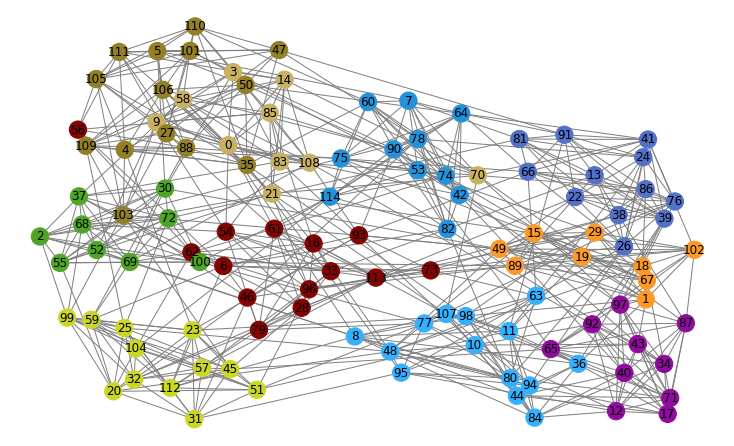

Data: D3-NLK.csv
Algorithm time: 0.823s
(54, 55, 56, 57, 58, 59, 60, 61, 62)
(9, 10, 11, 12, 13, 14, 15, 16, 17)
(32, 33, 34, 35, 27, 28, 29, 30, 31)
(0, 1, 2, 3, 4, 5, 6, 7, 8)
(36, 37, 38, 39, 40, 41, 42, 43, 44)
(45, 46, 47, 48, 49, 50, 51, 52, 53)
(18, 19, 20, 21, 22, 23, 24, 25, 26)
(64, 65, 66, 67, 68, 69, 70, 71, 63)
(72, 73, 74, 75, 76, 77, 78, 79, 80)


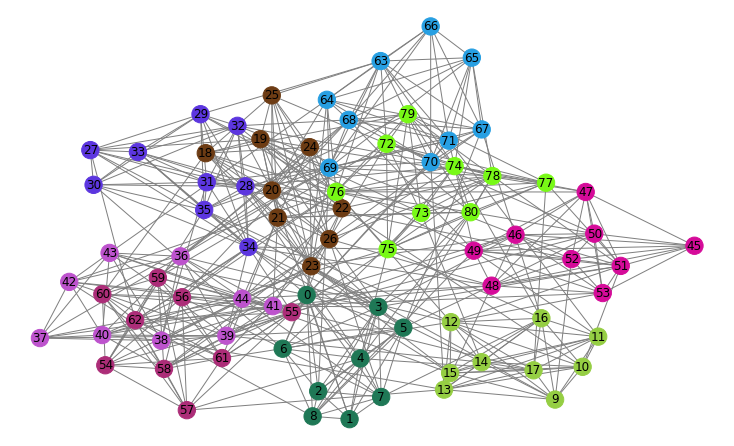

In [6]:
for idx in range(len(competition_names)):
    show_cluster_data(idx)

In [7]:
def new_cluster_color(cluster1, cluster2, cluster_colors):
    if len(cluster1) > len(cluster2):
        cluster_color = cluster_colors[cluster1]
    else:
        cluster_color = cluster_colors[cluster2]
    
    return cluster_color

In [8]:
def create_animation(graph, walk, nodes_position, animation_path):
    colors = np.random.random((graph.number_of_nodes(),3))  
    fig = plt.figure(figsize=(10,6)) 
    camera = Camera(fig)
    cluster_colors = {}
    for clusters in sorted(walk.modularities, key=len, reverse = True):
        if cluster_colors == {}:
            cluster_colors = {C: colors[i] for i, C in enumerate(clusters)}           
        else:          
            cluster1, cluster2 = set(prev_clusters) - set(clusters)
            new_color = new_cluster_color(cluster1, cluster2, cluster_colors)
            cluster_colors[tuple(set(clusters) - set(prev_clusters))[0]] = new_color
        
        dct = {n: cluster_colors[C] for C in clusters for n in C}

        nx.draw(graph, node_color=[dct[n] for n in graph.nodes()], pos=nodes_position, edge_color = "grey")
        camera.snap()
        prev_clusters = clusters
        if clusters == max(walk.modularities, key=walk.modularities.get):
            break
        
    animation = camera.animate(repeat_delay = 1000)
    animation.save(animation_path, writer='PillowWriter')

In [10]:
%%capture

for idx in range(len(competition_names)):
    if "animations" not in os.listdir():
        os.makedirs("animations")
    gif_name = "./animations/" + competition_names[idx].split(".")[0] + ".gif"
    create_animation(graphs[idx], walks[idx], nodes_position[idx], gif_name)